# Bibliothèques 📚

In [1]:
%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%pip install scikit-learn
from sklearn.impute import SimpleImputer
%pip install scipy
from scipy import stats
%pip install ipywidgets
import ipywidgets as widgets
from ipywidgets import interact
%pip install plotly
import plotly.express as px


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import des données

In [2]:
df = pd.read_csv('/Users/maximebarbier/Documents/00 - Repositories/taux-de-pression-et-emploi/data/external/fr-en-taux-de-pression-et-demploi.csv',sep=';')
df.sample(5)

,Année diplôme,Diplôme,Type de diplôme,Filière,Spécialité libellé,Taux d'emploi,Année première année,MEFSTAT libellé,Taux de pression,Demandes,Capacité,Code diplôme,MEFSTAT11,Code type diplôme,Code diplôme.1,MEFSTAT libellé court,Admis apprentissage 2019,Admis voie scolaire 2019
122,2019,CAP FERRONNIER D'ART,CAP,Métiers d'art,FERRONNIER D'ART,34.5,2020.0,1CAP2 FERRONNIER D'ART,1.084615,141.0,130.0,50025436,23210025436,500.0,50025436,1CAP225436,33.0,99
156,2019,CAP CONDUCTEUR D'INSTALLATIONS DE PRODUCTION,CAP,Biochimie industrielle,CONDUCTEUR D'INSTALLATIONS DE PRODUCTION,24.7,2020.0,1CAP2 CONDUCT. INSTALLATIONS PRODUCTION,0.572243,301.0,526.0,50020101,23210020101,500.0,50020101,1CAP220101,43.0,619
126,2019,BACPRO POISSONNIER-ECAILLER-TRAITEUR,BACPRO,"Alimentation, hôtellerie, restauration, tourisme",POISSONNIER-ECAILLER-TRAITEUR,40.0,2020.0,2NDPRO MET. DE L'ALIMENTAT. 2NDE COMMUNE,2.254936,2627.0,1165.0,40031209,23810022107,400.0,40022107,2NDPRO22107,21.0,7
160,2019,CAP PEINTURE EN CARROSSERIE,CAP,"Automobile, engins",PEINTURE EN CARROSSERIE,63.1,2020.0,1CAP2 PEINTURE EN CARROSSERIE,1.120930,482.0,430.0,50025433,23210025433,500.0,50025433,1CAP225433,1080.0,422
19,2019,"CAP COMPOSITES, PLASTIQUES CHAUDRONNES",CAP,Biochimie industrielle,"COMPOSITES, PLASTIQUES CHAUDRONNES",34.0,2020.0,1CAP2 COMPOSIT.PLASTIQ.CHAUDRONNES,0.689320,71.0,103.0,50022510,23210022510,500.0,50022510,1CAP222510,12.0,85


# 1 Nettoryage des données

## 1.1 Vérification des valeurs manquantes

In [5]:
df.isna().mean().sort_values(ascending=False)

Année diplôme               0.0
Diplôme                     0.0
Type de diplôme             0.0
Filière                     0.0
Spécialité libellé          0.0
Taux d'emploi               0.0
Année première année        0.0
MEFSTAT libellé             0.0
Taux de pression            0.0
Demandes                    0.0
Capacité                    0.0
Code diplôme                0.0
MEFSTAT11                   0.0
Code type diplôme           0.0
Code diplôme.1              0.0
MEFSTAT libellé court       0.0
Admis apprentissage 2019    0.0
Admis voie scolaire 2019    0.0
dtype: float64

In [4]:
### Remplacement des valeurs manquantes par la moyenne de la colonne
imputer = SimpleImputer(strategy='mean')    
df[['Taux de pression']] = imputer.fit_transform(df[['Taux de pression']])

## 1.2 Vérification des doublons

In [6]:
df.duplicated().value_counts(normalize=True)

False    1.0
Name: proportion, dtype: float64

Pas de doublons détectés

## 1.3 Vérification des types de données

In [7]:
df.dtypes

Année diplôme                 int64
Diplôme                      object
Type de diplôme              object
Filière                      object
Spécialité libellé           object
Taux d'emploi               float64
Année première année        float64
MEFSTAT libellé              object
Taux de pression            float64
Demandes                    float64
Capacité                    float64
Code diplôme                  int64
MEFSTAT11                     int64
Code type diplôme           float64
Code diplôme.1                int64
MEFSTAT libellé court        object
Admis apprentissage 2019    float64
Admis voie scolaire 2019      int64
dtype: object

Les types de données semblent corrects

## 1.4 Vérification des valeurs aberrantes

In [8]:
numeric_col = ['Taux de pression', "Taux d'emploi"]

In [9]:
# Calculer le nombre de lignes et colonnes
n_cols = 3
n_rows = (len(numeric_col) + n_cols - 1) // n_cols  # 3 graphiques par ligne

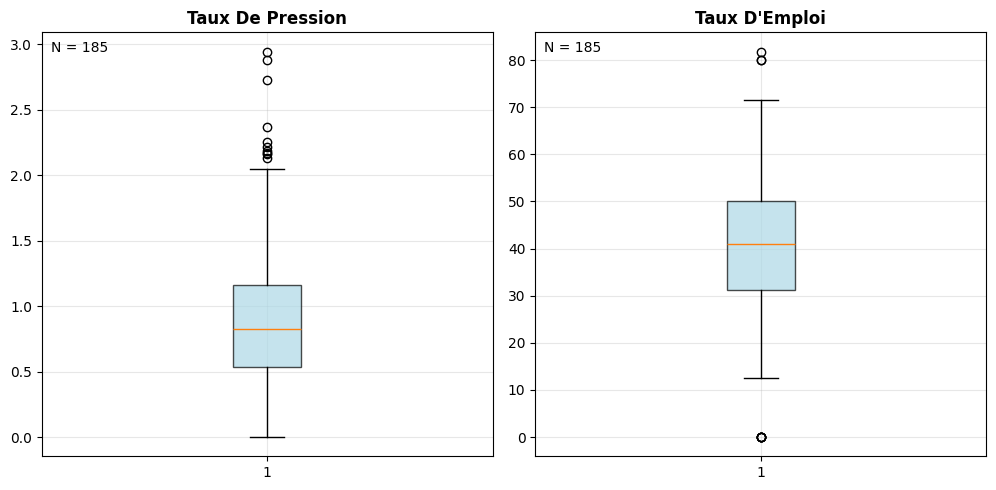

In [10]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Aplatir correctement les axes (même si 1 seule ligne)
axes = np.array(axes).reshape(-1)

for i, col in enumerate(numeric_col):
    ax = axes[i]
    # Boxplot avec détection des outliers
    ax.boxplot(df[col].dropna(),
               patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7))

    ax.set_title(f"{col.replace('_', ' ').title()}", fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Ajouter le nombre d'observations
    n_obs = df[col].notna().sum()
    ax.text(0.02, 0.98, f'N = {n_obs}',
            transform=ax.transAxes, verticalalignment='top')

# Masquer les axes inutilisés
for i in range(len(numeric_col), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
# Calculer le Z-scores :
df_numeric = df[numeric_col]

for col in numeric_col:
  z_scores = np.abs(stats.zscore(df_numeric[col]))
  outliers = df[z_scores > 3]
  nb_outliers = len(outliers)
  nb_total = len(df)
  pourcentage = (nb_outliers / nb_total) * 100

  print(col)
  print('='*18)
  print(f"Nombre d'outliers : {nb_outliers}")
  print(f"Nombre total d'observations : {nb_total}")
  print(f"Pourcentage d'outliers : {pourcentage:.2f}%")
  print("")

Taux de pression
Nombre d'outliers : 3
Nombre total d'observations : 185
Pourcentage d'outliers : 1.62%

Taux d'emploi
Nombre d'outliers : 0
Nombre total d'observations : 185
Pourcentage d'outliers : 0.00%



In [12]:
# Calcul du Z-score pour détecter les valeurs aberrantes pour le taux de pression
df['z_score'] = (df['Taux de pression'] - df['Taux de pression'].mean()) / df['Taux de pression'].std()
outliers = df[np.abs(df['z_score']) > 3]
outliers

,Année diplôme,Diplôme,Type de diplôme,Filière,Spécialité libellé,Taux d'emploi,Année première année,MEFSTAT libellé,Taux de pression,Demandes,Capacité,Code diplôme,MEFSTAT11,Code type diplôme,Code diplôme.1,MEFSTAT libellé court,Admis apprentissage 2019,Admis voie scolaire 2019,z_score
26,2019,BACPRO METIERS DE LA SECURITE,BACPRO,"Gestion-administration, transport, logistique,...",METIERS DE LA SECURITE,41.8,2020.0,2NDPRO METIERS DE LA SECURITE,2.944240,5597.0,1901.0,40034403,23810034403,400.0,40034403,2NDPRO34403,12.0,1855,3.594944
58,2019,CAP MAINTENANCE DES VEHICULES OPTION A VOITURE...,CAP,"Automobile, engins",MAINTENANCE DES VEHICULES OPTION A VOITURES PA...,42.5,2020.0,1CAP2 MAINT.VEHIC.OPTA VOIT.PARTICUL.,2.877229,4195.0,1458.0,50025218,23210025218,500.0,50025218,1CAP225218,3789.0,5516,3.475957
131,2019,BACPRO ARTISANAT ET METIERS D'ART OPTION : COM...,BACPRO,"Industries graphiques, communication, audiovis...",ARTISANAT ET METIERS D'ART OPTION : COMMUNICAT...,22.3,2020.0,2NDPRO ART.& MET.ART:COM.VIS.VIS.PLURI-M,2.725852,1919.0,704.0,40032303,23810032303,400.0,40032303,2NDPRO32303,33.0,1322,3.207166


In [18]:
df.drop(columns=['z_score'], inplace=True)

# 2 Analyse exploratoire des données (EDA)

## 2.1 Statistiques descriptives

In [13]:
df.describe()

df['Type de diplôme'].value_counts(normalize=True)
df['Filière'].value_counts(normalize=True)

df.pivot_table(index='Filière', values=['Taux de pression', "Taux d'emploi"], aggfunc=['mean', 'median', 'std']).round(2)


mean  \
                                                   Taux d'emploi   
Filière                                                            
Alimentation, hôtellerie, restauration, tourisme           52.07   
Automobile, engins                                         51.54   
Aéronautique                                               46.02   
Biochimie industrielle                                     28.05   
Construction, bâtiment, travaux publics                    41.69   
Electricité, électronique/numérique, environnement         35.01   
Gestion-administration, transport, logistique, ...         46.34   
Industries graphiques, communication, audiovisu...         25.41   
Mer                                                        34.17   
Métiers d'art                                              48.23   
Productique, mécanique, automatisation                     42.60   
Relation client, commerce, vente                           38.50   
Santé, social, services à la personne et à la c...         34.30   
Textile, habillement, cuir                                 38.66   

                                                                     \
                                                   Taux de pression   
Filière                                                               
Alimentation, hôtellerie, restauration, tourisme               0.94   
Automobile, engins                                             1.30   
Aéronautique                                                   1.80   
Biochimie industrielle                                         0.50   
Construction, bâtiment, travaux publics                        0.84   
Electricité, électronique/numérique, environnement             0.91   
Gestion-administration, transport, logistique, ...             1.20   
Industries graphiques, communication, audiovisu...             1.07   
Mer                                                            0.85   
Métiers d'art                                                  0.74   
Productique, mécanique, automatisation                         0.72   
Relation client, commerce, vente                               1.17   
Santé, social, services à la personne et à la c...             1.00   
Textile, habillement, cuir                                     0.50   

                                                          median  \
                                                   Taux d'emploi   
Filière                                                            
Alimentation, hôtellerie, restauration, tourisme           50.40   
Automobile, engins                                         56.30   
Aéronautique                                               50.05   
Biochimie industrielle                                     31.95   
Construction, bâtiment, travaux publics                    40.10   
Electricité, électronique/numérique, environnement         39.50   
Gestion-administration, transport, logistique, ...         42.40   
Industries graphiques, communication, audiovisu...         25.00   
Mer                                                        35.50   
Métiers d'art                                              46.20   
Productique, mécanique, automatisation                     41.60   
Relation client, commerce, vente                           40.90   
Santé, social, services à la personne et à la c...         30.95   
Textile, habillement, cuir                                 38.85   

                                                                     \
                                                   Taux de pression   
Filière                                                               
Alimentation, hôtellerie, restauration, tourisme               0.71   
Automobile, engins                                             1.14   
Aéronautique                                                   2.05   
Biochimie industrielle                                         0.56   
Construction, bâtiment, travaux publics  

## 2.2 Visualisations

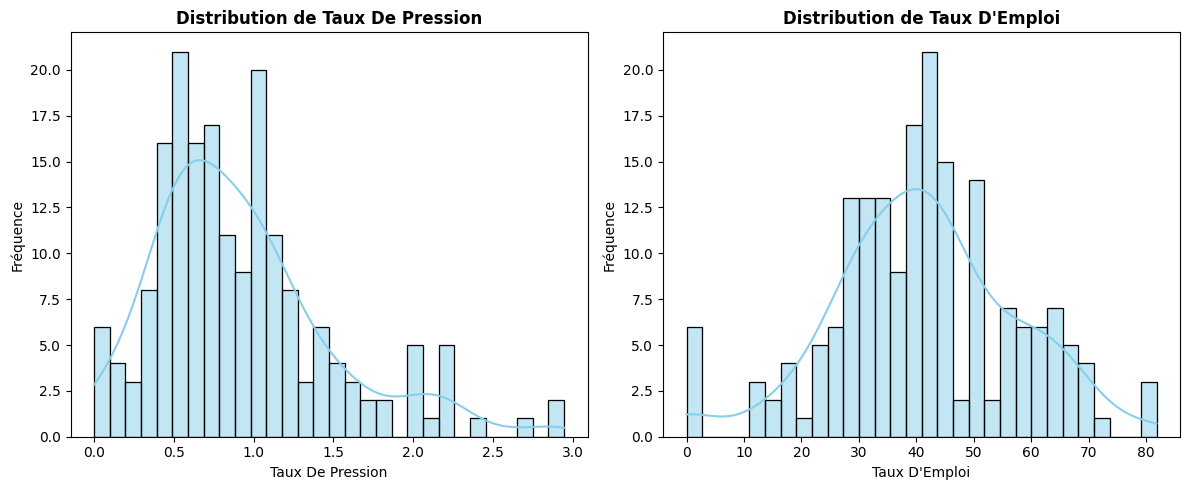

In [14]:
# Distribution des variables numériques
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_col):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution de {col.replace("_", " ").title()}', fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

In [15]:
### Relation entre le taux de pression et le taux d'emploi
# Liste unique des filières
filieres = sorted(df['Filière'].dropna().unique())

# Widget : liste à cocher multiple
filiere_selector = widgets.SelectMultiple(
    options=filieres,
    value=filieres,  # toutes sélectionnées par défaut
    description='Filières',
    layout={'width': '300px', 'height': '200px'}
)

# Fonction d'affichage dynamique
def update_plot(selected_filieres):
    plt.figure(figsize=(8, 6))
    data = df[df['Filière'].isin(selected_filieres)]
    
    sns.scatterplot(
        data=data,
        x='Taux de pression',
        y="Taux d'emploi",
        hue='Filière',
        palette='Set2',
        alpha=0.7
    )

    plt.title('Relation entre le Taux de Pression et le Taux d\'Emploi', fontweight='bold')
    plt.xlabel('Taux de Pression')
    plt.ylabel('Taux d\'Emploi')
    plt.legend(title='Filière', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Liaison du widget à la fonction
interact(update_plot, selected_filieres=filiere_selector)

interactive(children=(SelectMultiple(description='Filières', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.update_plot(selected_filieres)>